In [74]:
import pickle

import numpy as np

from keyrover.datasets import id_to_key
from keyrover import *

In [30]:
with open(f"{RAW_TEXCOORDS}/key_texcoords.bin", "rb") as file:
    data = pickle.load(file)
    
len(data)

4999

In [97]:
U = []
V = []

U_by_class = {}
V_by_class = {}

for u, v, classes in data:
    U += u
    V += v
    
    for x, y, cls in zip(u, v, classes):
        if cls not in U_by_class:
            U_by_class[cls] = []
            V_by_class[cls] = []

        U_by_class[cls].append(x)
        V_by_class[cls].append(y)

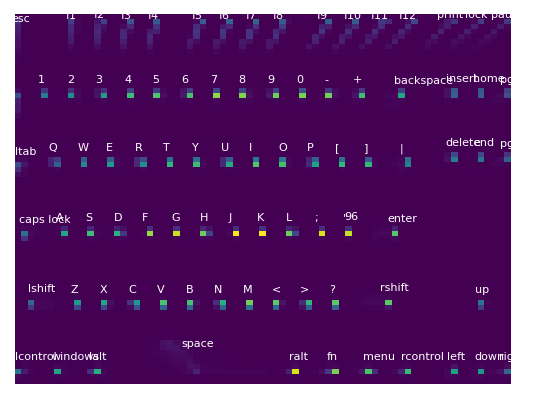

In [101]:
ax = plt.gca()
ax.hist2d(U, V, bins=75)

U_means = {}
V_means = {}

for (cls, u), (_, v) in zip(U_by_class.items(), V_by_class.items()):
    cls = int(cls)
    U_means[cls] = np.mean(u)
    V_means[cls] = np.mean(v)
    ax.text(U_means[cls] - 3, V_means[cls] + 7, id_to_key.get(cls, str(cls)), c="white", fontsize=8)

ax.axis("off")
plt.show()

In [103]:
with open(f"{RAW_TEXCOORDS}/key_texcoords_mean.bin", "wb") as file:
    pickle.dump(U_means, file)
    pickle.dump(V_means, file)